# Multiple Linear Regression (Exp 3)

# Step 1: Import Libraries

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the Iris Dataset

In [5]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Step 3: Define Features and Target Variable

In [7]:
# Define the independent variables (features) and the dependent variable (target)
X = iris[['sepal_length', 'sepal_width', 'petal_width']]  # Features
y = iris['petal_length']  # Target variable

# Step 4: Split the Dataset

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Add a Constant to the Model
# Step 6: Fit the Multiple Linear Regression Model
# Step 7: Print the Model Summary

In [11]:
# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train_sm).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1243.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           5.65e-88
Time:                        20:06:07   Log-Likelihood:                -27.046
No. Observations:                 120   AIC:                             62.09
Df Residuals:                     116   BIC:                             73.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2622      0.312     -0.840   

# Step 8: Make Predictions

In [13]:
# Prepare the test set by adding a constant
X_test_sm = sm.add_constant(X_test)

# Make predictions
y_pred = model.predict(X_test_sm)

# Step 9: Evaluate the Model

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.1300162603138272
R-squared: 0.9603293155857663


# Step 10: Visualize Actual vs. Predicted Values


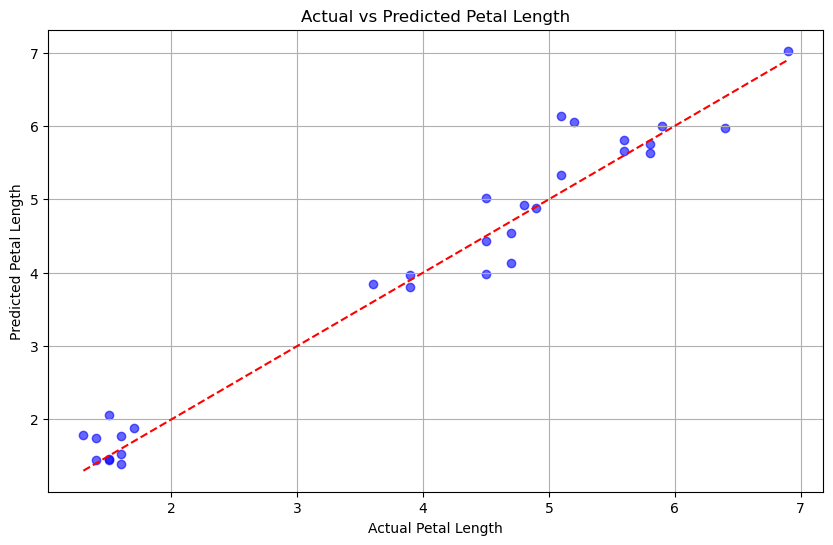

In [21]:
# Create a DataFrame for plotting
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results['Actual'], results['Predicted'], color='blue', alpha=0.6)
plt.plot([results['Actual'].min(), results['Actual'].max()], 
         [results['Actual'].min(), results['Actual'].max()], 
         color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Petal Length')
plt.xlabel('Actual Petal Length')
plt.ylabel('Predicted Petal Length')
plt.grid()
plt.show()